In [8]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import Libraries :

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



Convert to HSV Color Space , Define the Range for Green Color , Mask for Green Color, Extract the green areas, Increase the Saturation and brightness , Enchanced the image :

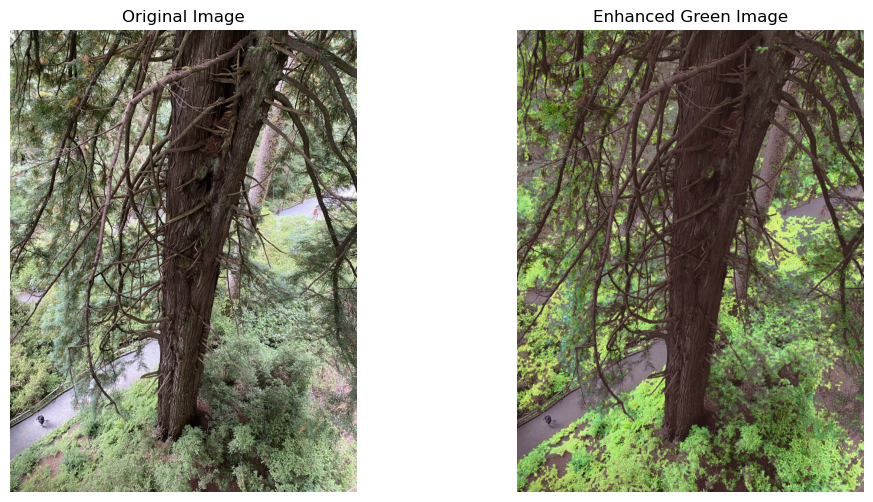

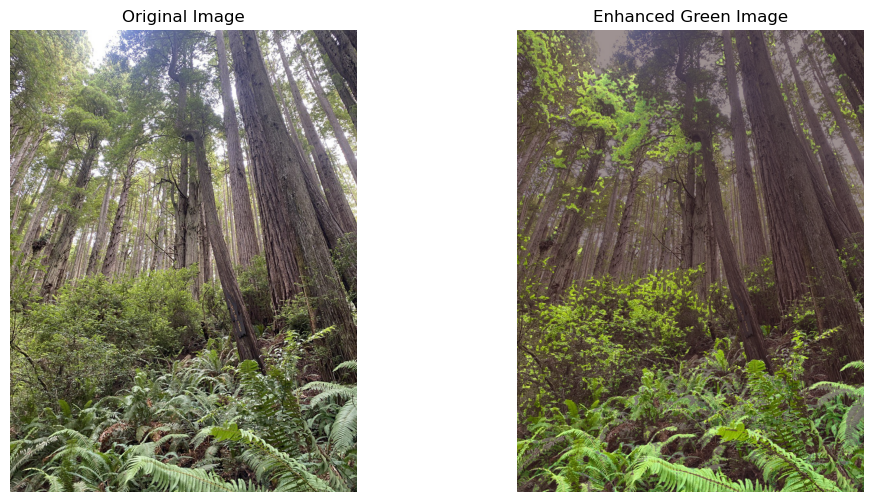

In [34]:
def enhance_green_in_forest(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for green color (you can tweak the values as needed)
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    # Create a mask for the green color
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Extract the green areas from the original image
    green_area = cv2.bitwise_and(hsv_image, hsv_image, mask=green_mask)

    # Increase the saturation and brightness of the green areas
    hue, saturation, value = cv2.split(green_area)
    saturation = cv2.add(saturation, 100)  # Increase saturation by 100 (higher value)
    value = cv2.add(value, 60)  # Increase brightness by 60 (higher value)

    # Merge the channels back
    enhanced_green = cv2.merge([hue, saturation, value])

    # Convert back to BGR color space
    enhanced_image = cv2.cvtColor(enhanced_green, cv2.COLOR_HSV2BGR)

    # Blend the enhanced green with the original image more aggressively
    final_image = cv2.addWeighted(image, 0.5, enhanced_image, 0.5, 0)  # Adjust blend ratio for more green impact

    # Convert the images to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Show the original image
    ax[0].imshow(image_rgb)
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    # Show the enhanced image
    ax[1].imshow(final_image_rgb)
    ax[1].axis('off')
    ax[1].set_title('Enhanced Green Image')

    # Display the images
    plt.show()

# Specify the paths for your images
image_path1 = r'C:\vishnu\image\image_gr1.jpg'
image_path2 = r'C:\vishnu\image\image_gr2.jpg'

# Enhance and show the green color in both images
enhance_green_in_forest(image_path1)
enhance_green_in_forest(image_path2)